In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras 
import warnings

warnings.filterwarnings('ignore')
print(tf.__version__)
for model in sklearn, pd, keras, np ,mlp:
    print(model.__name__, model.__version__)

2.1.0
sklearn 0.20.2
pandas 0.24.2
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
numpy 1.17.4
matplotlib 2.1.2


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=2)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [3]:
# version 0.2 数据归一化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_valid = std.transform(x_valid)
x_test = std.transform(x_test)

In [4]:
x_train.shape[1:]

(8,)

In [5]:
# tf.keras.models.Sequential()
# version dnn, 多层神经网络，循环添加层次。
# 使用sklearn进行随机超参数搜索
# 1. 转化成sklearn的model
def build_model(hidden_layers=1,
                layer_size=30,
                learning_rate=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, 
                                 input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers -1):
        model.add(keras.layers.Dense(layer_size, activation='relu'))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',optimizer=optimizer)
    return model

In [6]:
# version 0.3 回调函数
# Tensorboard, Earlystopping, Modelcheckpoint
logdir = './reg_search_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "housing_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_model)



In [7]:
history = sklearn_model.fit(x_train, y_train, epochs=10,validation_data=(x_valid, y_valid),callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 62us/sample - loss: 1.9468 - val_loss: 0.5263
Epoch 2/10
11610/11610 [==============================] - 0s 39us/sample - loss: 0.7093 - val_loss: 0.5293
Epoch 3/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5375 - val_loss: 0.5660
Epoch 4/10
11610/11610 [==============================] - 0s 38us/sample - loss: 0.5815 - val_loss: 0.5349
Epoch 5/10
11610/11610 [==============================] - 0s 36us/sample - loss: 0.5781 - val_loss: 0.5305
Epoch 6/10
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5335 - val_loss: 0.5254


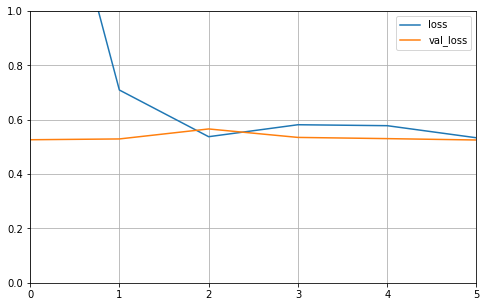

In [8]:
def plot_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curve(history)

In [20]:
# 使用sklearn中的函数进行搜索
from scipy.stats import reciprocal
param_distribution = {
    "hidden_layers":[1, 2, 3, 4],
    "layer_size":np.arange(1,100),
    "learning_rate":reciprocal(1e-4, 1e-2)
}

from sklearn.model_selection import RandomizedSearchCV
random_search_cv = RandomizedSearchCV(sklearn_model,
                                      param_distributions=param_distribution,
                                      n_iter=10,
                                      n_jobs=1)

random_search_cv.fit(x_train, y_train, epochs=10,validation_data=(x_valid, y_valid),callbacks=callbacks)

Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 102us/sample - loss: 0.7765 - val_loss: 0.4667
Epoch 2/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5848 - val_loss: 0.4828
Epoch 3/10
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4538 - val_loss: 0.4279
Epoch 4/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5833 - val_loss: 0.4519
Epoch 5/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5527 - val_loss: 0.4266
Epoch 6/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4769 - val_loss: 0.4376
Epoch 7/10
7740/7740 [==============================] - 0s 64us/sample - loss: 1.1888 - val_loss: 0.4400
Epoch 8/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4233 - val_loss: 0.4328
Epoch 9/10
7740/7740 [==============================] - 1s 68us/sample - loss: 0.3917 - val_loss: 0.3994
Epoch 

7740/7740 [==============================] - 0s 18us/sample - loss: 0.5173
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 82us/sample - loss: 5.0639 - val_loss: 3.7373
Epoch 2/10
7740/7740 [==============================] - 0s 53us/sample - loss: 2.8870 - val_loss: 2.0815
Epoch 3/10
7740/7740 [==============================] - 0s 64us/sample - loss: 1.5914 - val_loss: 1.1652
Epoch 4/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.9353 - val_loss: 0.7537
Epoch 5/10
7740/7740 [==============================] - 0s 55us/sample - loss: 0.6721 - val_loss: 0.6145
Epoch 6/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5898 - val_loss: 0.5735
Epoch 7/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5648 - val_loss: 0.5564
Epoch 8/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5529 - val_loss: 0.5475
Epoch 9/10
7740/7740 [===============

7740/7740 [==============================] - 0s 53us/sample - loss: 0.4797 - val_loss: 0.4814
Epoch 5/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5183 - val_loss: 0.4360
Epoch 6/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4397 - val_loss: 0.4375
Epoch 7/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4375 - val_loss: 0.4288
Epoch 8/10
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4210 - val_loss: 0.4205
Epoch 9/10
7740/7740 [==============================] - 0s 51us/sample - loss: 0.4124 - val_loss: 0.4196
Epoch 10/10
7740/7740 [==============================] - 0s 24us/sample - loss: 0.4168
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 112us/sample - loss: 1.1533 - val_loss: 0.4715
Epoch 2/10
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4453 - val_loss: 0.4123
Epoch 3/10
7740/7740 [=============

7740/7740 [==============================] - 0s 24us/sample - loss: 0.3715
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 97us/sample - loss: 1.5902 - val_loss: 0.6353
Epoch 2/10
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5684 - val_loss: 0.5635
Epoch 3/10
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5975 - val_loss: 0.5309
Epoch 4/10
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5359 - val_loss: 0.6209
Epoch 5/10
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6475 - val_loss: 0.5914
Epoch 6/10
7740/7740 [==============================] - 0s 54us/sample - loss: 0.7959 - val_loss: 0.5154
Epoch 7/10
7740/7740 [==============================] - 0s 53us/sample - loss: 0.7337 - val_loss: 0.5601
Epoch 8/10
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6305 - val_loss: 0.5195
Epoch 9/10
7740/7740 [===============

Epoch 10/10
7740/7740 [==============================] - 0s 22us/sample - loss: 0.3803
Train on 7740 samples, validate on 3870 samples
Epoch 1/10
7740/7740 [==============================] - 1s 75us/sample - loss: 2.4401 - val_loss: 0.5845
Epoch 2/10
7740/7740 [==============================] - 0s 44us/sample - loss: 0.6360 - val_loss: 0.5366
Epoch 3/10
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5566 - val_loss: 0.5125
Epoch 4/10
7740/7740 [==============================] - 0s 43us/sample - loss: 0.5603 - val_loss: 0.4816
Epoch 5/10
7740/7740 [==============================] - 0s 40us/sample - loss: 0.4928 - val_loss: 0.4780
Epoch 6/10
7740/7740 [==============================] - 0s 42us/sample - loss: 0.4856 - val_loss: 0.4820
Epoch 7/10
7740/7740 [==============================] - 0s 39us/sample - loss: 0.4799 - val_loss: 0.4644
Epoch 8/10
7740/7740 [==============================] - 0s 38us/sample - loss: 0.4720 - val_loss: 0.4558
Epoch 9/10
7740/7740 [===

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x141b0d908>,
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'hidden_layers': [1, 2, 3, 4], 'layer_size': array([ 1,  2, ..., 98, 99]), 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1487daa58>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [17]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)
print(random_search_cv.best_estimator_)

{'hidden_layers': 2, 'layer_size': 98, 'learning_rate': 0.0024378872676702953}
-0.37408522249910975


In [18]:
model = random_search_cv.best_estimator_.model
model.evaluate(x_test,y_test)

5160/5160 [==============================] - 0s 27us/sample - loss: 0.3813


0.38133598880250325